**R로 S&P500 데이터를 분석해보자.**</br>

나의 투자성향
- 장기투자
- 롱돌이
- 적립식투자
- 추세추종
- ETF, 인덱스 펀드 매니아
- 미국에 대한 절대적 믿음

In [1]:
options(warn=-1)
# install.packages("quantmode")
# install.packages("PerformanceAnalytics")
# install.packages("dplyr")
# install.packages("scales")

# **I. LOAD LIBRARY**

In [2]:
library(quantmod)
library(PerformanceAnalytics)
library(xts)
library(scales)

Loading required package: xts



Loading required package: zoo




Attaching package: ‘zoo’




The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Loading required package: TTR



Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




Attaching package: ‘PerformanceAnalytics’




The following object is masked from ‘package:graphics’:

    legend




# **II. LOAD DATA**

In [3]:
ticker_code <- "SPY"
start_date <- "1993-01-01"
end_date <- Sys.Date()

In [4]:
getSymbols(ticker_code, src='yahoo', from=start_date, to=end_date)
xts_spy <- get(ticker_code)
xts_spy

[1] "SPY"

            SPY.Open  SPY.High   SPY.Low SPY.Close SPY.Volume SPY.Adjusted
1993-01-29  43.96875  43.96875  43.75000  43.93750    1003200     24.68411
1993-02-01  43.96875  44.25000  43.96875  44.25000     480500     24.85967
1993-02-02  44.21875  44.37500  44.12500  44.34375     201300     24.91233
1993-02-03  44.40625  44.84375  44.37500  44.81250     529400     25.17568
1993-02-04  44.96875  45.09375  44.46875  45.00000     531500     25.28100
1993-02-05  44.96875  45.06250  44.71875  44.96875     492100     25.26345
1993-02-08  44.96875  45.12500  44.90625  44.96875     596100     25.26345
1993-02-09  44.81250  44.81250  44.56250  44.65625     122100     25.08790
1993-02-10  44.65625  44.75000  44.53125  44.71875     379600     25.12301
1993-02-11  44.78125  45.12500  44.78125  44.93750      19500     25.24591
       ...                                                                
2024-07-26 542.28003 547.19000 541.48999 544.44000   53763800    544.44000
2024-07-29 546.02002 547.

# **III. SMA(Simple Moving Average) Analysis**

In [5]:
xts_spy$SPY.SMA20 <- SMA(Cl(xts_spy), n=20)
xts_spy$SPY.SMA60 <- SMA(Cl(xts_spy), n=60)
xts_spy$SPY.SMA200 <- SMA(Cl(xts_spy), n=200)
xts_spy[, c("SPY.SMA20", "SPY.SMA60", "SPY.SMA200")]

           SPY.SMA20 SPY.SMA60 SPY.SMA200
1993-01-29        NA        NA         NA
1993-02-01        NA        NA         NA
1993-02-02        NA        NA         NA
1993-02-03        NA        NA         NA
1993-02-04        NA        NA         NA
1993-02-05        NA        NA         NA
1993-02-08        NA        NA         NA
1993-02-09        NA        NA         NA
1993-02-10        NA        NA         NA
1993-02-11        NA        NA         NA
       ...                               
2024-07-26  552.5525  537.8263   496.7671
2024-07-29  552.5795  538.5665   497.3182
2024-07-30  552.4125  539.1827   497.8466
2024-07-31  552.5025  539.8413   498.4324
2024-08-01  552.0800  540.2820   498.9899
2024-08-02  550.9930  540.5447   499.4742
2024-08-05  549.0980  540.5478   499.8810
2024-08-06  547.4145  540.5808   500.3407
2024-08-07  545.2815  540.5445   500.8019
2024-08-08  543.9900  540.7068   501.3492

## **Check Market Trend : Bull or Bear?**

In [6]:
xts_spy$SPY.MarketTrend <- ifelse(xts_spy$SPY.SMA60 - xts_spy$SPY.SMA200 >0, TRUE, FALSE)
    # Bull -> 0, Bear -> 1
xts_spy[,c("SPY.SMA20", "SPY.SMA60", "SPY.SMA200", "SPY.MarketTrend")]

           SPY.SMA20 SPY.SMA60 SPY.SMA200 SPY.MarketTrend
1993-01-29        NA        NA         NA              NA
1993-02-01        NA        NA         NA              NA
1993-02-02        NA        NA         NA              NA
1993-02-03        NA        NA         NA              NA
1993-02-04        NA        NA         NA              NA
1993-02-05        NA        NA         NA              NA
1993-02-08        NA        NA         NA              NA
1993-02-09        NA        NA         NA              NA
1993-02-10        NA        NA         NA              NA
1993-02-11        NA        NA         NA              NA
       ...                                               
2024-07-26  552.5525  537.8263   496.7671               1
2024-07-29  552.5795  538.5665   497.3182               1
2024-07-30  552.4125  539.1827   497.8466               1
2024-07-31  552.5025  539.8413   498.4324               1
2024-08-01  552.0800  540.2820   498.9899               1
2024-08-02  55

## **Check CrossOver Point**

In [7]:
# GOLDEN CROSS
xts_spy$SPY.GoldenCross <- ifelse(xts_spy$SPY.MarketTrend == TRUE & lag(xts_spy$SPY.MarketTrend, 1) == FALSE, 1, 0)

# DEAD CROSS
xts_spy$SPY.DeadCross <- ifelse(xts_spy$SPY.MarketTrend == FALSE & lag(xts_spy$SPY.MarketTrend, 1) == TRUE, 1, 0)

xts_spy[,c("SPY.SMA60", "SPY.SMA200", "SPY.MarketTrend", "SPY.GoldenCross", "SPY.DeadCross")]

           SPY.SMA60 SPY.SMA200 SPY.MarketTrend SPY.GoldenCross SPY.DeadCross
1993-01-29        NA         NA              NA              NA            NA
1993-02-01        NA         NA              NA              NA            NA
1993-02-02        NA         NA              NA              NA            NA
1993-02-03        NA         NA              NA              NA            NA
1993-02-04        NA         NA              NA              NA            NA
1993-02-05        NA         NA              NA              NA            NA
1993-02-08        NA         NA              NA              NA            NA
1993-02-09        NA         NA              NA              NA            NA
1993-02-10        NA         NA              NA              NA            NA
1993-02-11        NA         NA              NA              NA            NA
       ...                                                                   
2024-07-26  537.8263   496.7671               1               0 

In [8]:
# GET THE DATES OF GOLDEN CROSS
print("Golden Cross : ")
cat(format(index(xts_spy[xts_spy$SPY.GoldenCross == 1,]), "%Y-%m-%d"), sep=", ", "\n")

# GET THE DATES OF DEAD CROSS
print("Dead Cross : ")
cat(format(index(xts_spy[xts_spy$SPY.DeadCross == 1,]), "%Y-%m-%d"), sep=", ", "\n")

[1] "Golden Cross : "


1994-09-26, 1998-12-16, 2003-05-23, 2004-11-10, 2006-09-19, 2009-06-29, 2010-10-25, 2012-02-01, 2016-05-04, 2019-04-09, 2020-07-17, 2023-02-03, 


[1] "Dead Cross : "


1994-04-28, 1998-10-07, 2000-11-09, 2004-08-23, 2006-07-28, 2008-01-03, 2010-07-15, 2011-08-17, 2015-09-01, 2018-12-17, 2020-04-03, 2022-03-23, 


## **Visualilzation**

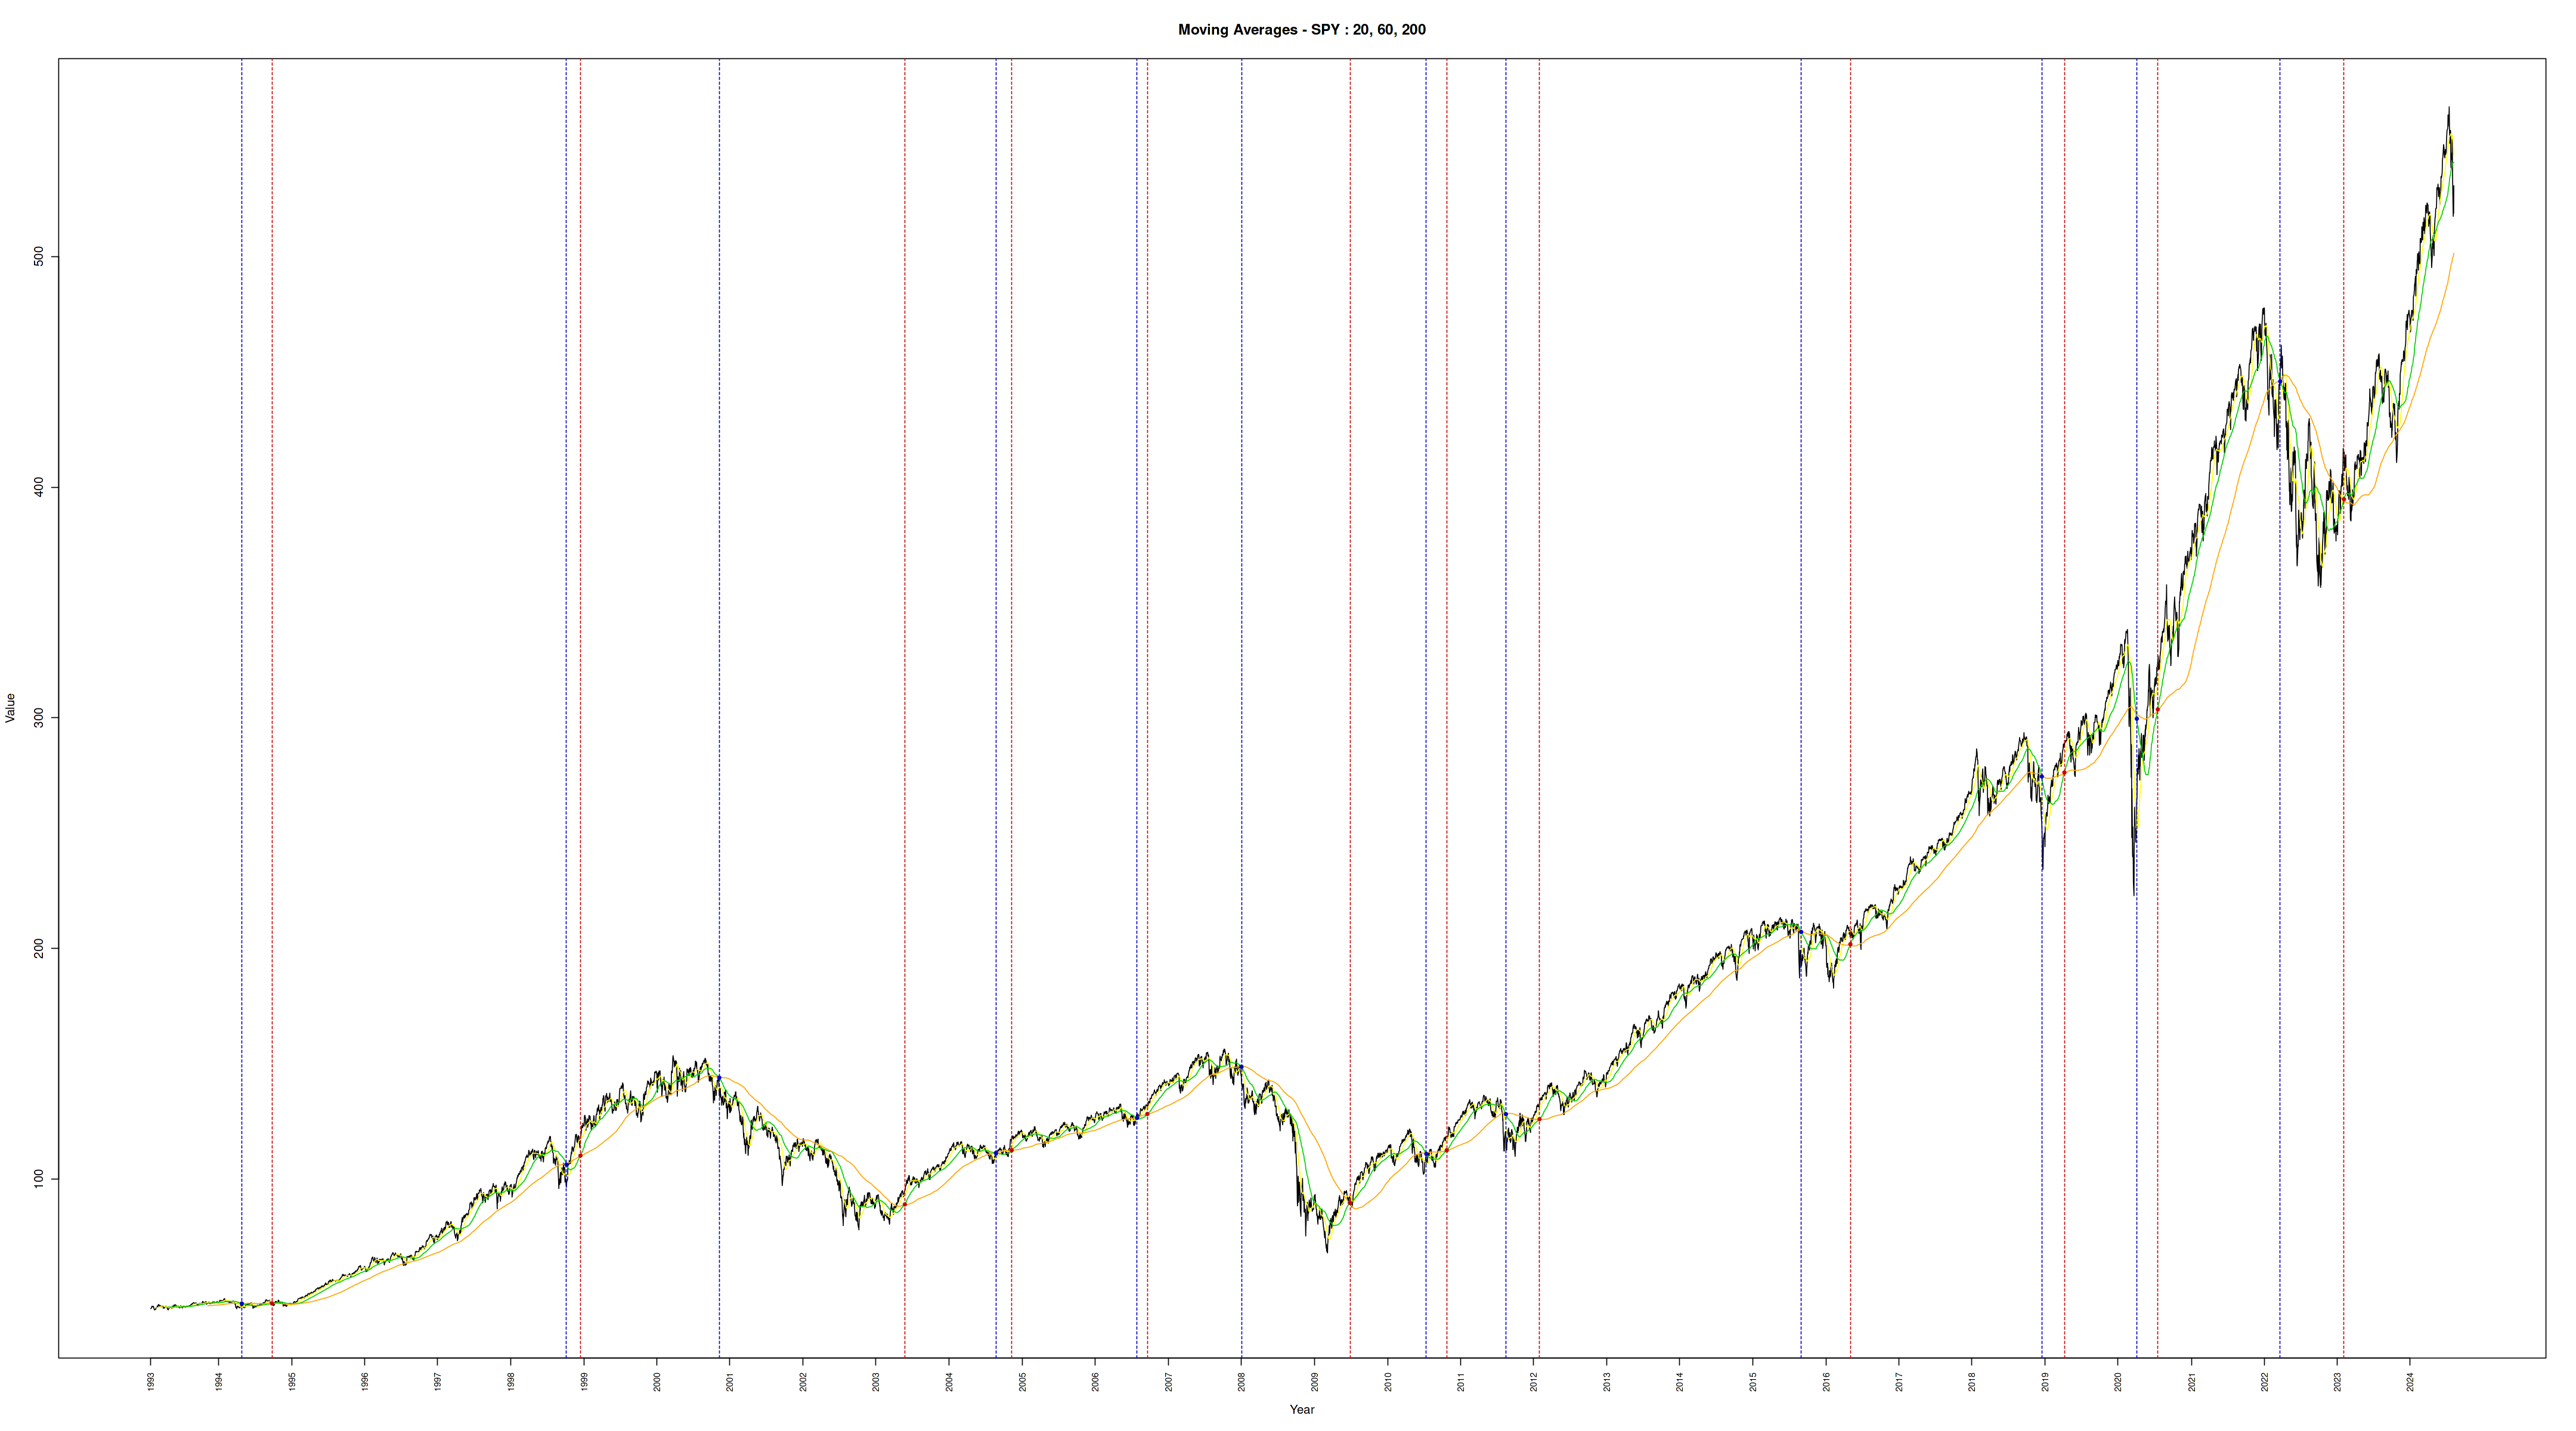

In [9]:
options(repr.plot.width=36, repr.plot.height=20)
visualization_moving_avg <- function(ticker_code, start_date, end_date){
  
    # LOAD DATA
    getSymbols(ticker_code, src="yahoo", from=start_date, to=end_date)
    df <- get(ticker_code)
  
    ## CALCUATE SMA
    cl_price <- Cl(df)
    sma_20 <- SMA(cl_price, n=20)
    sma_60 <- SMA(cl_price, n=60)
    sma_200 <- SMA(cl_price, n=200)
    
    ## BASIC PLOTTING
      plot(index(df), coredata(cl_price), type='l', col='black',
           main = "Moving Averages - SPY : 20, 60, 200",
           xlab = "Year", ylab="Value",
           xaxt = 'n')
      
    ## ADD 'YEAR' LABEL
      years <- format(index(df), "%Y")
      unique_years <- unique(years)

      yearly_first_indexes <- sapply(unique_years, function(y) {
        min(which(years == y))
        })

      axis(1, 
           at=index(SPY)[yearly_first_indexes], 
           labels=unique_years, 
           las=2, 
           cex.axis=0.7, 
           tick=TRUE)
}      

    
visualization_moving_avg(ticker_code, "1993-01-27", Sys.Date())


sma_20 <- SMA(Cl(xts_spy), n=20)
sma_60 <- SMA(Cl(xts_spy), n=60)
sma_200 <- SMA(Cl(xts_spy), n=200)


## PLOT OTHER LINES
lines(index(sma_20), coredata(sma_20), col = 'yellow')
lines(index(sma_60), coredata(sma_60), col = 'green3')
lines(index(sma_200), coredata(sma_200), col = 'orange')
      
      
# SELECT CROSSOVERS
crossovers <- which(diff(sign(sma_60 - sma_200)) !=0)
cross_dates <- index(sma_60)[crossovers]

# PLOT CROSSOVER points
# Identify crossover points
golden_cross <- which(diff(sign(sma_60 - sma_200)) == 2) + 1
dead_cross <- which(diff(sign(sma_60 - sma_200)) == -2) + 1

# Plot Golden cross
if (length(golden_cross) > 0) {
  points(index(sma_60)[golden_cross], sma_60[golden_cross], col="red3", pch=19, cex=0.5)
  abline(v=index(sma_60)[golden_cross], col="red3", lty=2)
}
  
  
# Plot Dead cross
if (length(dead_cross) > 0) {
  points(index(sma_60)[dead_cross], sma_60[dead_cross], col="blue3", pch=19, cex=0.5)
  abline(v=index(sma_60)[dead_cross], col="blue3", lty=2)
}

# **IV. Basic Strategy : Trading at Crossover point**

## **Pesuod Code**

```
DIM HAS_STOCKS := 주식 보유> 
DIM FIRST_BUY():= 첫 번째 매매 
DIM SMA_50 := 50일 이동평균선
DIM SMA_200 := 200일 이동평균선
DIM BUY_PRCIE := 매수 당시 가격
DIM SELL_PRICE := 매도 당시 가격
DIM LONG() := 매수
DIM SHORT() := 매도
DIM WAIT() := 대기
HAS_STOCKS = FALSE

FIRST_BUY()
    IF SMA_50 > SMA_200 //최초의 매수 시점은 50일 이동평균선과 200일 이동평균선이 정배일 경우   
        BUY()
        HAS_STOCKS = TRUE
    ELSE (SMA =< SMA_200) //역배열일 경우는 하락/횡보장이므로 대기한다
        WAIT()
        HAS_STOCKS = FALSE

//이후의 매매 패턴
AFTER FIRST_BUY()
    WHILE TRUE : 
        IF HAS_STOCKS = TRUE : //주식 보유 시(상승장에서 매매하였다)
            IF SMA_50 > SMA_200 : //50일 이동평균선이 200일 이동평균선보다 높을 때 -> 지속적인 상승장
                WAIT() //보유한다
            ELSE (SMA_50 =< SMA_200) : //50일 이동평균선이 200일 이동평균선보다 낮을 때 -> 하락장의 본격 시작
                IF SELL_PRICE > BUY_PRICE : //매도가가 매수가보다 높을 때
                    SELL()
                    HAS_STOCKS = FALSE
                ELSE : //매도가가 매수가보다 낮을 때(상승세가 꺽였던 SMA_50 > SMA_200에서 최초 매수했던 경우)
                    WAIT() //다음 상승장까지 버텨야 한다
        ELSE HAS_STOCKS = FALSE : //주식 미보유 시(하락장 시작 전에 매매하였다)
            IF SMA_50 < SMA_200 : //50일 이동평균선이 200일 이동평균선보다 낮을 때 -> 하락장의 지속
                WAIT() //대기한다
            ELSE (SMA_200 >= SMA_50) : //50일 이동평균선이 200일 이동평균선보다 높을 때 -> 상승장의 본격 시작
                BUY()
                HAS_STOCKS = TRUE
```

## **Calculate Expected Rate of Return**

`SPY.Adjusted` : 흔히 말하는 S&P 500 지수를 추종하는 ETF인 SPDR S&P 500 ETF Trust (SPY)의 수정 종가. 
수정 종가는 주식의 분할, 배당, 기타 법인 행위를 반영하여 조정된 종가이다. 실제 투자의 수익률을 보다 정확하게 반영하기 위해 사용되며, 주식의 역사적인 가격 변동을 분석할 때 중요하게 활용된다

In [10]:
# 최초의 골든 크로스에서 주식 1주를 구매 후, 데드 크로스에서 팔고, 다시 골든 크로스에서 사기를 반복했을 때, 벌어들인 차액은 얼마일까

golden_cross <- index(xts_spy[xts_spy$SPY.GoldenCross == 1,])
dead_cross <- index(xts_spy[xts_spy$SPY.DeadCross == 1,])

In [11]:
require(data.table)
df <- as.data.frame(as.data.table(xts_spy))
df$date <- as.Date(df$index)
tail(df)

Loading required package: data.table




Attaching package: ‘data.table’




The following objects are masked from ‘package:xts’:

    first, last




The following objects are masked from ‘package:zoo’:

    yearmon, yearqtr




,index,SPY.Open,SPY.High,SPY.Low,SPY.Close,SPY.Volume,SPY.Adjusted,SPY.SMA20,SPY.SMA60,SPY.SMA200,SPY.MarketTrend,SPY.GoldenCross,SPY.DeadCross,date
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
7933,2024-08-01,552.57,554.87,539.43,543.01,76428700,543.01,552.0800,540.2820,498.9899,1,0,0,2024-08-01
7934,2024-08-02,535.75,536.99,528.60,532.90,82789100,532.90,550.9930,540.5447,499.4742,1,0,0,2024-08-02
7935,2024-08-05,511.64,523.58,510.27,517.38,146267400,517.38,549.0980,540.5478,499.8810,1,0,0,2024-08-05
7936,2024-08-06,519.22,529.75,517.87,522.15,84826300,522.15,547.4145,540.5808,500.3407,1,0,0,2024-08-06
7937,2024-08-07,528.47,531.59,518.05,518.66,70698300,518.66,545.2815,540.5445,500.8019,1,0,0,2024-08-07
7938,2024-08-08,523.91,531.29,521.84,530.65,62200000,530.65,543.9900,540.7068,501.3492,1,0,0,2024-08-08


In [12]:
# 수익률 계산을 위한 함수
calculate_returns <- function(df, golden_cross, dead_cross) {
    
    df$returns <- 0
    df$invest.amount <-0
  
for (g_idx in golden_cross) {
    
    df$invest.amount[df$date == as.Date(g_idx)] <- df$SPY.Adjusted[df$date == as.Date(g_idx)] # 투자금(주식 구입 비용)
    subsequent_dead_cross <- dead_cross[dead_cross > g_idx][1]  # 골든 크로스 이후 첫 번째 데드 크로스
    
    if (!is.na(subsequent_dead_cross)) {
        df$returns[df$date == as.Date(subsequent_dead_cross)] <- df$SPY.Adjusted[df$date == as.Date(subsequent_dead_cross)] - df$SPY.Adjusted[df$date == as.Date(g_idx)]  # 차익 계산
    }
  }
  return(df)
}

In [13]:
result_df <- calculate_returns(df, golden_cross, dead_cross)
total_returns <- sum(result_df$returns)
print(paste("returns: ", total_returns))
tail(result_df)

[1] "returns:  309.60255241394"


,index,SPY.Open,SPY.High,SPY.Low,SPY.Close,SPY.Volume,SPY.Adjusted,SPY.SMA20,SPY.SMA60,SPY.SMA200,SPY.MarketTrend,SPY.GoldenCross,SPY.DeadCross,date,returns,invest.amount
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>
7933,2024-08-01,552.57,554.87,539.43,543.01,76428700,543.01,552.0800,540.2820,498.9899,1,0,0,2024-08-01,0,0
7934,2024-08-02,535.75,536.99,528.60,532.90,82789100,532.90,550.9930,540.5447,499.4742,1,0,0,2024-08-02,0,0
7935,2024-08-05,511.64,523.58,510.27,517.38,146267400,517.38,549.0980,540.5478,499.8810,1,0,0,2024-08-05,0,0
7936,2024-08-06,519.22,529.75,517.87,522.15,84826300,522.15,547.4145,540.5808,500.3407,1,0,0,2024-08-06,0,0
7937,2024-08-07,528.47,531.59,518.05,518.66,70698300,518.66,545.2815,540.5445,500.8019,1,0,0,2024-08-07,0,0
7938,2024-08-08,523.91,531.29,521.84,530.65,62200000,530.65,543.9900,540.7068,501.3492,1,0,0,2024-08-08,0,0


In [14]:
all_crosses <- c(golden_cross, dead_cross)

filtered_df <- result_df[result_df$date %in% all_crosses, ]

filtered_df

,index,SPY.Open,SPY.High,SPY.Low,SPY.Close,SPY.Volume,SPY.Adjusted,SPY.SMA20,SPY.SMA60,SPY.SMA200,SPY.MarketTrend,SPY.GoldenCross,SPY.DeadCross,date,returns,invest.amount
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>
315,1994-04-28,45.18750,45.25000,44.81250,44.95312,287000,26.03836,44.70312,46.20521,46.25500,0,0,1,1994-04-28,0.000000,0.00000
419,1994-09-26,46.07812,46.17188,45.98438,46.14062,223000,27.06653,47.00234,46.18542,46.17703,1,1,0,1994-09-26,0.000000,27.06653
1438,1998-10-07,98.62500,100.03125,95.75000,97.12500,14348500,61.43317,102.15625,106.71927,106.80836,0,0,1,1998-10-07,34.366644,0.00000
1487,1998-12-16,117.12500,117.12500,115.75000,116.53125,7260000,73.70792,117.24766,110.07786,109.94656,1,1,0,1998-12-16,0.000000,73.70792
1967,2000-11-09,140.00000,141.21875,137.25000,140.03125,10635300,90.48942,139.79688,144.28984,144.42234,0,0,1,2000-11-09,16.781502,0.00000
2600,2003-05-23,93.53000,93.98000,93.14000,93.76000,26155900,62.77956,93.33000,88.96333,88.85570,1,1,0,2003-05-23,0.000000,62.77956
2914,2004-08-23,110.55000,110.77000,110.05000,110.20000,33745100,75.22491,109.16750,111.45100,111.45715,0,0,1,2004-08-23,12.445358,0.00000
2970,2004-11-10,117.06000,117.55000,116.76000,116.97000,45265400,80.17862,113.18000,112.44883,112.42790,1,1,0,2004-11-10,0.000000,80.17862
3401,2006-07-28,127.04000,128.14000,126.86000,127.98000,82137000,90.71723,126.01000,126.66633,126.75140,0,0,1,2006-07-28,10.538612,0.00000


2020-04-03일의 마이너스 수익률이 거슬린다. 원인을 분석하기 위해 해당 부분만 확대해 본다

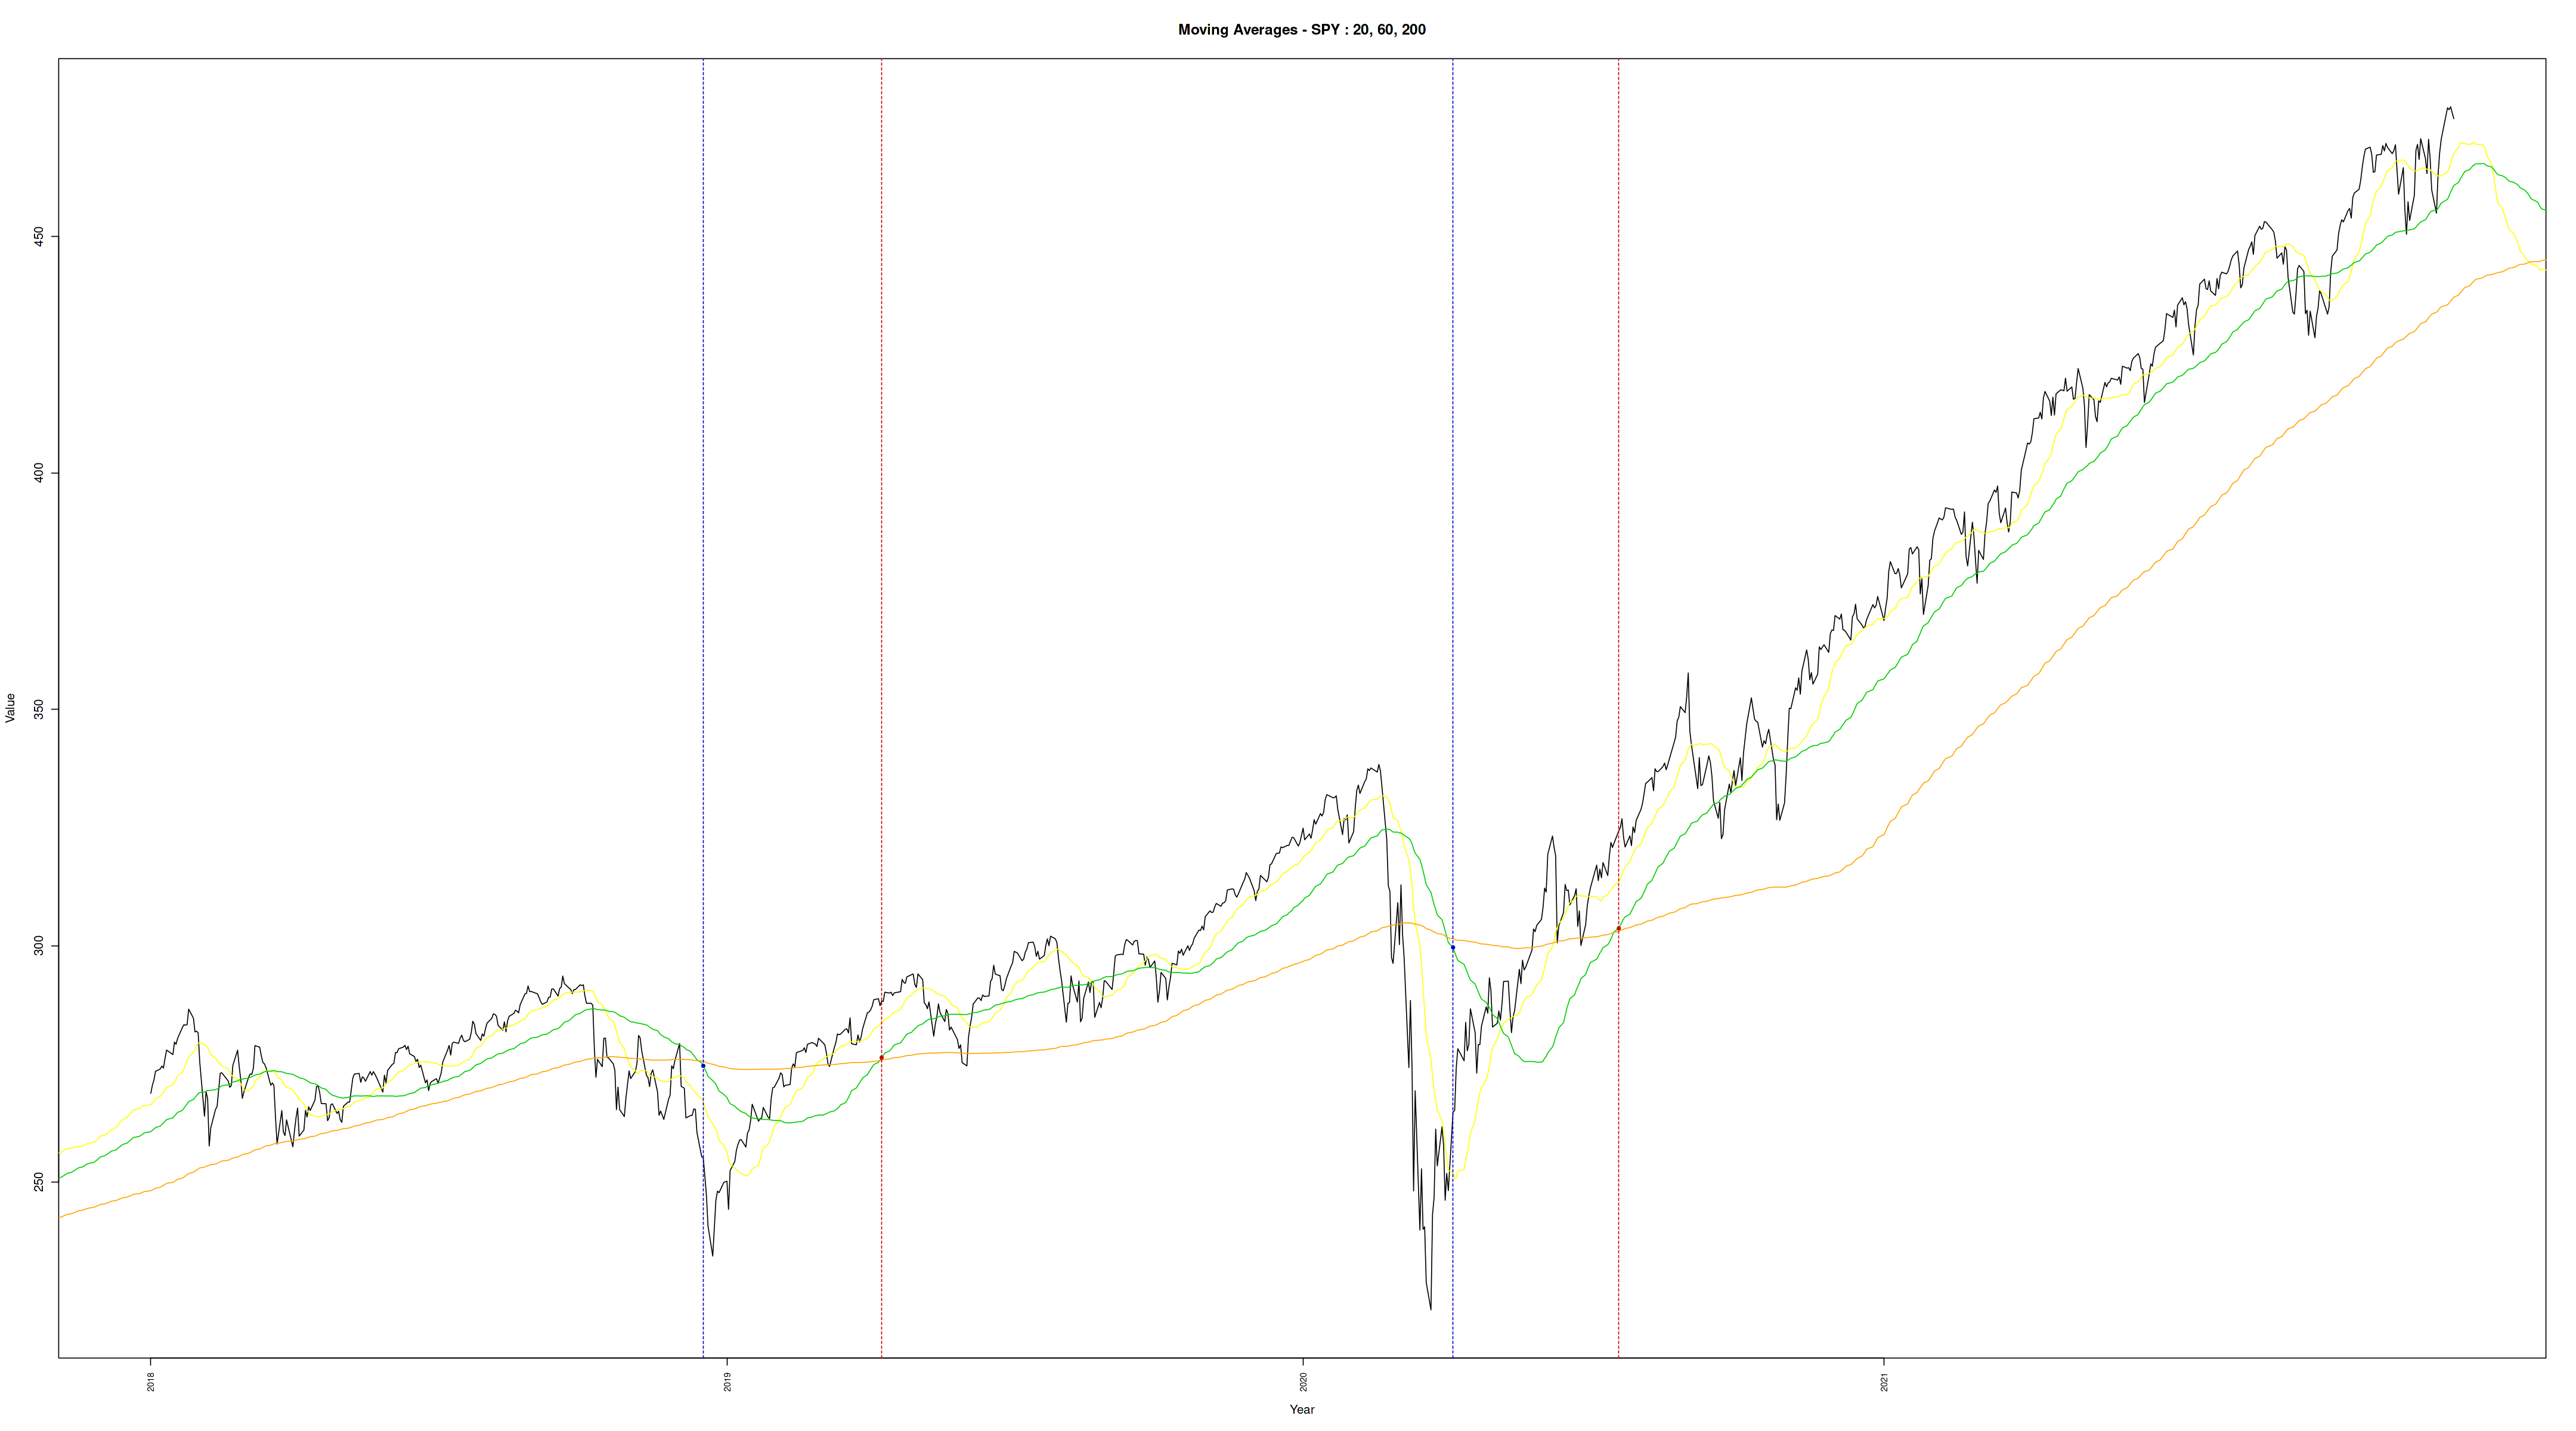

In [15]:
visualization_moving_avg("SPY", "2018-01-01", "2022-01-01")
## PLOT OTHER LINES
sma_20 <- SMA(Cl(xts_spy), n=20)
sma_60 <- SMA(Cl(xts_spy), n=60)
sma_200 <- SMA(Cl(xts_spy), n=200)


lines(index(sma_20), coredata(sma_20), col = 'yellow')
lines(index(sma_60), coredata(sma_60), col = 'green3')
lines(index(sma_200), coredata(sma_200), col = 'orange')


# SELECT CROSSOVERS
crossovers <- which(diff(sign(sma_60 - sma_200)) !=0)
cross_dates <- index(sma_60)[crossovers]

# PLOT CROSSOVER points
# Identify crossover points
golden_cross <- which(diff(sign(sma_60 - sma_200)) == 2) + 1
dead_cross <- which(diff(sign(sma_60 - sma_200)) == -2) + 1

# Plot Golden cross
if (length(golden_cross) > 0) {
  points(index(sma_60)[golden_cross], sma_60[golden_cross], col="red3", pch=19, cex=0.5)
  abline(v=index(sma_60)[golden_cross], col="red3", lty=2)
}
  
  
# Plot Dead cross
if (length(dead_cross) > 0) {
  points(index(sma_60)[dead_cross], sma_60[dead_cross], col="blue3", pch=19, cex=0.5)
  abline(v=index(sma_60)[dead_cross], col="blue3", lty=2)
}

종가에 팔았다고 가정을 할 경우, 급격한 폭락으로, 데드 크로스는 이전 골든 크로스보다도 위에 있엇지만, 가격은 매우 낮았다. 이렇게 손해보는 구간을 피해야 한다.

60일 이평선이 200일 이평선을 뚫을 때 쯤이면, 이미 하강장에 횡보/또는 폭락인 경우가 많았다. 이평선을 뚫기 전에 폭락 신호를 감지할 수 있는 방법이 필요하다


## **Searching Best SMA CrossOver Strategy**

이평선을 계속 바꿔가면서 최적의 수익률을 계산해보자

In [16]:
sma_crossover_strategy <- function(short, long, tk_code, start_date, end_date){
    
    # LOAD DATA
    getSymbols(ticker_code, src='yahoo', from=start_date, to=end_date)
    xts_dt <- get(ticker_code)
    xts_dt
    
    # CALC LONG/SHORT SMA
    xts_dt$SMA.Short <- SMA(Cl(xts_dt), n=short)
    xts_dt$SMA.Long <- SMA(Cl(xts_dt), n=long)
    
    # CHECK BULL OR BEAR
    xts_dt$MarketTrend <- ifelse(xts_dt$SMA.Short - xts_dt$SMA.Long >0 ,TRUE, FALSE)
    
    # GOLDEN CROSS
    xts_dt$GoldenCross <- ifelse(xts_dt$MarketTrend == TRUE & lag(xts_dt$MarketTrend, 1) == FALSE, 1, 0)

    # DEAD CROSS
    xts_dt$DeadCross <- ifelse(xts_dt$MarketTrend == FALSE & lag(xts_dt$MarketTrend, 1) == TRUE, 1, 0)
    
    # GET DATE (INDEX)
    golden_cross_idx <- index(xts_dt[xts_dt$GoldenCross == 1,])
    dead_cross_idx <- index(xts_dt[xts_dt$DeadCross == 1,])
    
    # CONVERT DATAFRAME
    require(data.table)
    df <- as.data.frame(as.data.table(xts_dt))
    df$date <- as.Date(df$index)
    
    result_df <- calculate_returns(df, golden_cross_idx, dead_cross_idx)

    total_invest <- sum(result_df$invest.amount)
    total_returns <- sum(result_df$returns)
    revenue_rate <- (total_invest + total_returns)/total_invest
    
    print(paste("short :", short, "long :", long, "invest :", total_invest,  "returns :", total_returns, "revenue.rates :", revenue_rate))
    
    all_crosses <- c(golden_cross, dead_cross)
    filtered_df <- result_df[result_df$date %in% all_crosses, ]
    
    results <- c(total_invest, total_returns, revenue_rate)
    return(results)
}

In [17]:
short_terms <- c(5, 10, 20, 40, 60, 80)
long_terms <- c(10, 20, 40, 60, 80, 120, 200, 240)

short_terms_days <- c()
long_terms_days <- c()
invest_amount <- c()
total_revenues <- c()
total_revenues_rate <-c()

for (short_term in short_terms){
    for (long_term in long_terms){
        if (short_term < long_term){
            results <- sma_crossover_strategy(short_term, long_term, "SPY", "1993-01-29", Sys.Date())
            short_terms_days <- c(short_terms_days, short_term)
            long_terms_days <- c(long_terms_days, long_term)
            invest_amount <- c(invest_amount, results[1]) 
            total_revenues <- c(total_revenues, results[2])
            total_revenues_rate <-c(total_revenues_rate, results[3])
        }
    }
}

[1] "short : 5 long : 10 invest : 61766.2438392639 returns : 123.257883071899 revenue.rates : 1.00199555413136"
[1] "short : 5 long : 20 invest : 33622.7350292206 returns : 353.978147506714 revenue.rates : 1.01052794031179"
[1] "short : 5 long : 40 invest : 21243.432346344 returns : 255.397146224976 revenue.rates : 1.01202240495138"
[1] "short : 5 long : 60 invest : 17927.4295902252 returns : 268.678352355957 revenue.rates : 1.01498699805255"
[1] "short : 5 long : 80 invest : 13859.3150119781 returns : 268.088542938232 revenue.rates : 1.01934356371195"
[1] "short : 5 long : 120 invest : 10165.9055671692 returns : 368.122661590576 revenue.rates : 1.03621149725996"
[1] "short : 5 long : 200 invest : 6088.79542732239 returns : 324.730800628662 revenue.rates : 1.05333251946214"
[1] "short : 5 long : 240 invest : 5915.46649551392 returns : 275.354400634766 revenue.rates : 1.04654821404932"
[1] "short : 10 long : 20 invest : 27165.1936740875 returns : 300.891502380371 revenue.rates : 1.01107

#### **Test Report**

In [18]:
test_report_for_smacross_strategy = data.frame("short"=short_terms_days,
                                               "long"=long_terms_days,
                                               "invest"=round(as.numeric(invest_amount), 2),
                                               "returns"=round(as.numeric(total_revenues),2),
                                                "rates"=round(as.numeric(total_revenues_rate), 2))
#                                                "rates"=percent(x=round(as.numeric(total_revenues_rate), 2), accuracy=0.01))
                                              
head(test_report_for_smacross_strategy)
tail(test_report_for_smacross_strategy)
summary(test_report_for_smacross_strategy)

,short,long,invest,returns,rates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,10,61766.24,123.26,1.00
2,5,20,33622.74,353.98,1.01
3,5,40,21243.43,255.40,1.01
4,5,60,17927.43,268.68,1.01
5,5,80,13859.32,268.09,1.02
6,5,120,10165.91,368.12,1.04


,short,long,invest,returns,rates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28,60,120,3614.11,286.22,1.08
29,60,200,1754.03,309.60,1.18
30,60,240,1747.97,323.39,1.19
31,80,120,4105.49,322.64,1.08
32,80,200,1785.26,314.81,1.18
33,80,240,1682.32,280.70,1.17


     short            long           invest         returns     
 Min.   : 5.00   Min.   : 10.0   Min.   : 1682   Min.   :123.3  
 1st Qu.:10.00   1st Qu.: 60.0   1st Qu.: 3594   1st Qu.:264.1  
 Median :20.00   Median :120.0   Median : 6357   Median :280.7  
 Mean   :27.58   Mean   :126.4   Mean   :10432   Mean   :281.3  
 3rd Qu.:40.00   3rd Qu.:200.0   3rd Qu.:13136   3rd Qu.:309.6  
 Max.   :80.00   Max.   :240.0   Max.   :61766   Max.   :368.1  
     rates      
 Min.   :1.000  
 1st Qu.:1.020  
 Median :1.040  
 Mean   :1.064  
 3rd Qu.:1.080  
 Max.   :1.190  

### **BEST LONG-SHORT TERM : 60, 240**

## **Calculate Rate of Return Considering the Effect of Compound Interest**

**복리 효과를 가정하여, 데드크로스에서 실현한 차익을 합쳐 골든 크로스에 다시 주식을 산다고 하면 얼마의 수익을 얻게 될까**